In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

from sklearn.ensemble import RandomForestClassifier

In [93]:
# Importing the dataset
df = pd.read_csv('OnlineNewsPopularity.csv')

#drop non-predictive items
df=df.drop(['url', ' timedelta'], axis=1)

df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [94]:
#separate variables into X (independents) and Y (dependent)
X = []
y= []
X = df.iloc[:, :57]
y = df.iloc[:, 58]
X

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.230769,0.378636,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.266667,0.286915,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.142857,0.495833,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.333333,0.385965,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.139785,0.411127,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455
5,10,370,0.559889,1.0,0.698198,2,2,0,0,4.359459,...,0.476190,0.350610,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857
6,8,960,0.418163,1.0,0.549834,21,20,20,0,4.654167,...,0.172043,0.402039,0.100000,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000
7,12,989,0.433574,1.0,0.572108,20,20,20,0,4.617796,...,0.153061,0.427720,0.100000,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000
8,11,97,0.670103,1.0,0.836735,2,0,0,0,4.855670,...,0.400000,0.566667,0.400000,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000
9,10,231,0.636364,1.0,0.797101,4,1,1,1,5.090909,...,0.437500,0.298413,0.100000,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000


In [95]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42, test_size=0.5)

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

score = regressor.score(X_train, y_train)
print(f"R2 Score: {score}")

R2 Score: 0.02641404920298407


In [96]:
print(f'Accuracy: {regressor.score(X_test, y_test)}')

Accuracy: 0.017044973429869326


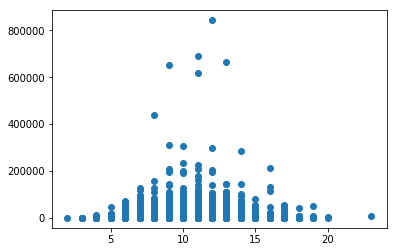

Close to normal distribution


In [97]:
import matplotlib.pyplot as plt

# n_tokens_title: Number of words in the title 
pltX = df.iloc[:, 0].values
plty = df.iloc[:, 58].values

plt.scatter(pltX, plty)
plt.show()
print("Close to normal distribution")

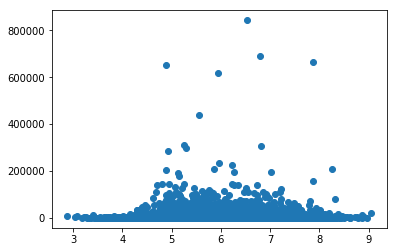

Skewed


In [112]:
#n_tokens_content: Number of words in the content 
pltX = df.iloc[:, 1].apply(np.log)
plty = df.iloc[:, 58].values

plt.scatter(pltX, plty)
plt.show()
print("Maybe")

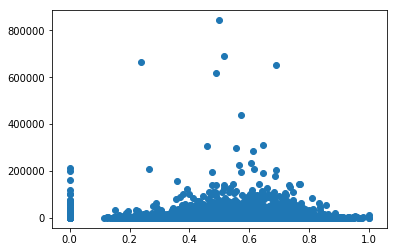

One outlier - needs adj


In [99]:
#n_unique_tokens: Rate of unique words in the content 
pltX = df.iloc[:, 2].values
plty = df.iloc[:, 58].values

plt.scatter(pltX, plty)
plt.show()
print("Normalish?")

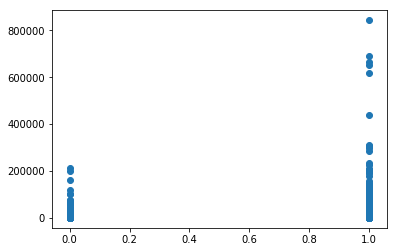

Not linear


In [115]:
#n_non_stop_words: Rate of non-stop words in the content 
pltX = df.iloc[:, 3].values
plty = df.iloc[:, 58].values

plt.scatter(pltX, plty)
plt.show()
print("Not linear")

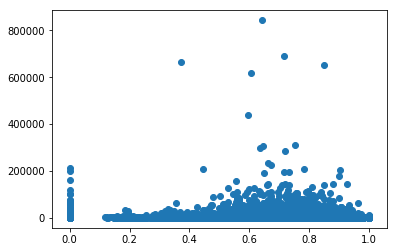

Not linear


In [102]:
#n_non_stop_unique_tokens: Rate of unique non-stop words in the content 
pltX = df.iloc[:, 4].values
plty = df.iloc[:, 58].values

plt.scatter(pltX, plty)
plt.show()
print("Not linear")

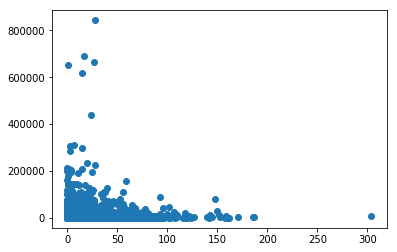

Skewed


In [123]:
#num_hrefs: Number of links  
pltX = df.iloc[:, 5].values
plty = df.iloc[:, 58].values

plt.scatter(pltX, plty)
plt.show()
print("Skewed")

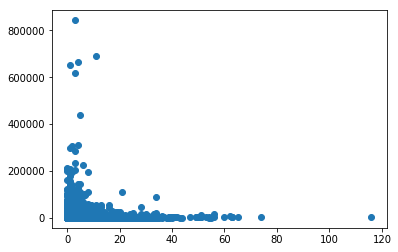

Skewed


In [122]:
#num_self_hrefs: Number of links to other articles published by Mashable 
pltX = df.iloc[:, 6].values
plty = df.iloc[:, 58].values

plt.scatter(pltX, plty)
plt.show()
print("Skewed")

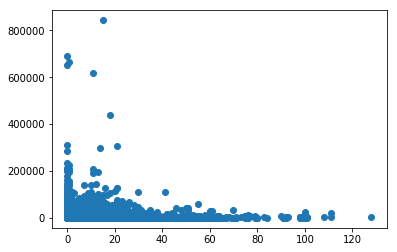

Skewed


In [158]:
#9. num_imgs: Number of images
pltX = df.iloc[:, 7].values
plty = df.iloc[:, 58].values

plt.scatter(pltX, plty)
plt.show()
print("Skewed")

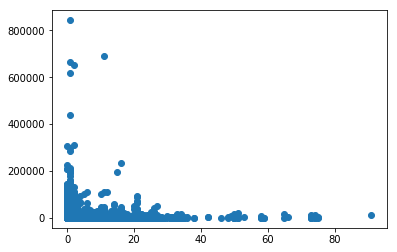

Skewed


In [160]:
#num_videos: Number of videos 
pltX = df.iloc[:, 8].values
plty = df.iloc[:, 58].values

plt.scatter(pltX, plty)
plt.show()
print("Skewed")

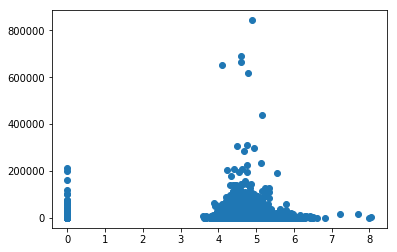

Not linear


In [126]:
#num_videos: Number of videos 
pltX = df.iloc[:, 9].values
plty = df.iloc[:, 58].values

plt.scatter(pltX, plty)
plt.show()
print("Not linear")

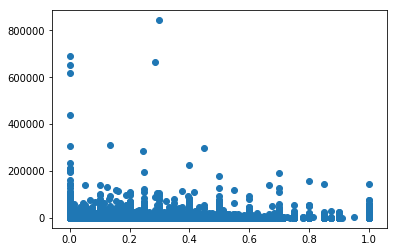

In [156]:
pltX = df.iloc[:, 57].values
plty = df.iloc[:, 58].values

plt.scatter(pltX, plty)
plt.show()

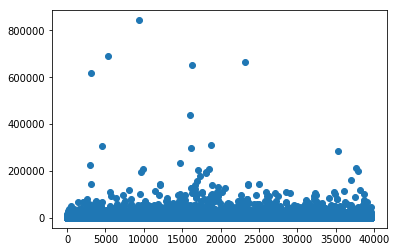

In [166]:
pltX = range(39643)
plty = df.iloc[:, 58].values

plt.scatter(pltX, plty)
plt.show()